# **Prediction of Product Sales**
**Author: Medha Patel**

## **Project Overview**

  This project aims to help retailers understand the properties of their products and outlets that play crucial roles in increasing sales. Using data analysis and machine learning techniques, the project will identify the most significant factors that influence sales performance and explore segmentation strategies to group similar products and outlets together. The goal is to provide retailers with a comprehensive understanding of their sales data and enable them to make data-driven decisions that increase revenue, improve customer satisfaction, and drive long-term success. An interactive dashboard will allow retailers to visualize and explore the data, experiment with input parameters, and generate custom reports.

### Data Dictionary

  - **Item_Identifier**: Unique product ID
  - **Item_Weight**: Weight of product
  - **Item_Fat_Content**: Whether the product is low fat or regular
  - **Item_Visibility**: The percentage of total display area of all products in store allocated to the particular product
  - **Item_Type**: The category to which the product belongs
  - **Item_MRP**: Maximum Retail Price (list price) of the product
  - **Outlet_Identifier**: Unique store ID
  - **Outlet_Establishment_Year**: The year in which store was established
  - **Outlet_Size**: The size of the store in terms of ground area covered
  - **Outlet_Location_Type**: The type of area in which the store is located
  - **Outlet_Type**: Whether the outlet is a grocery store or some sort of supermarket
  - **Item_Outlet_Sales**: Sales of product in particular store. This is the target variable to be predicted





## **Load and Inspect Data**

Import Libraries

In [1]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Regression Model IMPORTS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## REGRESSION METRIX
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

!pip install pandas

In [2]:
!pip install sklearn

### **Load Data**

In [3]:
#Load Data
file = 'Data/sales_predictions_2023.csv'

df = pd.read_csv(file)

#Copy of Dataframe
df_ml = df.copy()

### **Inspect Data**

#### **Head()**

In [4]:
#Head()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **shape()**

In [5]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


#### **dtypes**

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **Info()**

In [7]:
#Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **describe()**

In [8]:
#Descriptive statistics for numeric columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#Descriptive statistics for categoric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## **Clean Data**

#### **Dropping/Replacing Columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Duplicated Data**


In [11]:
dup_rows = df.duplicated().sum()
print(f'There are {dup_rows} duplicate rows.')

There are 0 duplicate rows.


#### **Unique Values**

In [12]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#Unique Value percentage
unique_percentage = df.nunique()/len(df) * 100
unique_percentage

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

#### **Missing Values**

In [14]:
#Finding number of missing values
missing_values = df.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#percent of missing_values
missing_values_percent = missing_values/len(df) * 100
missing_values_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### **Fixing Data Types**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Visualizing Missing Values with Missingno**

In [17]:
import missingno as msno
!pip install --upgrade missingno
!pip install --upgrade matplotlib

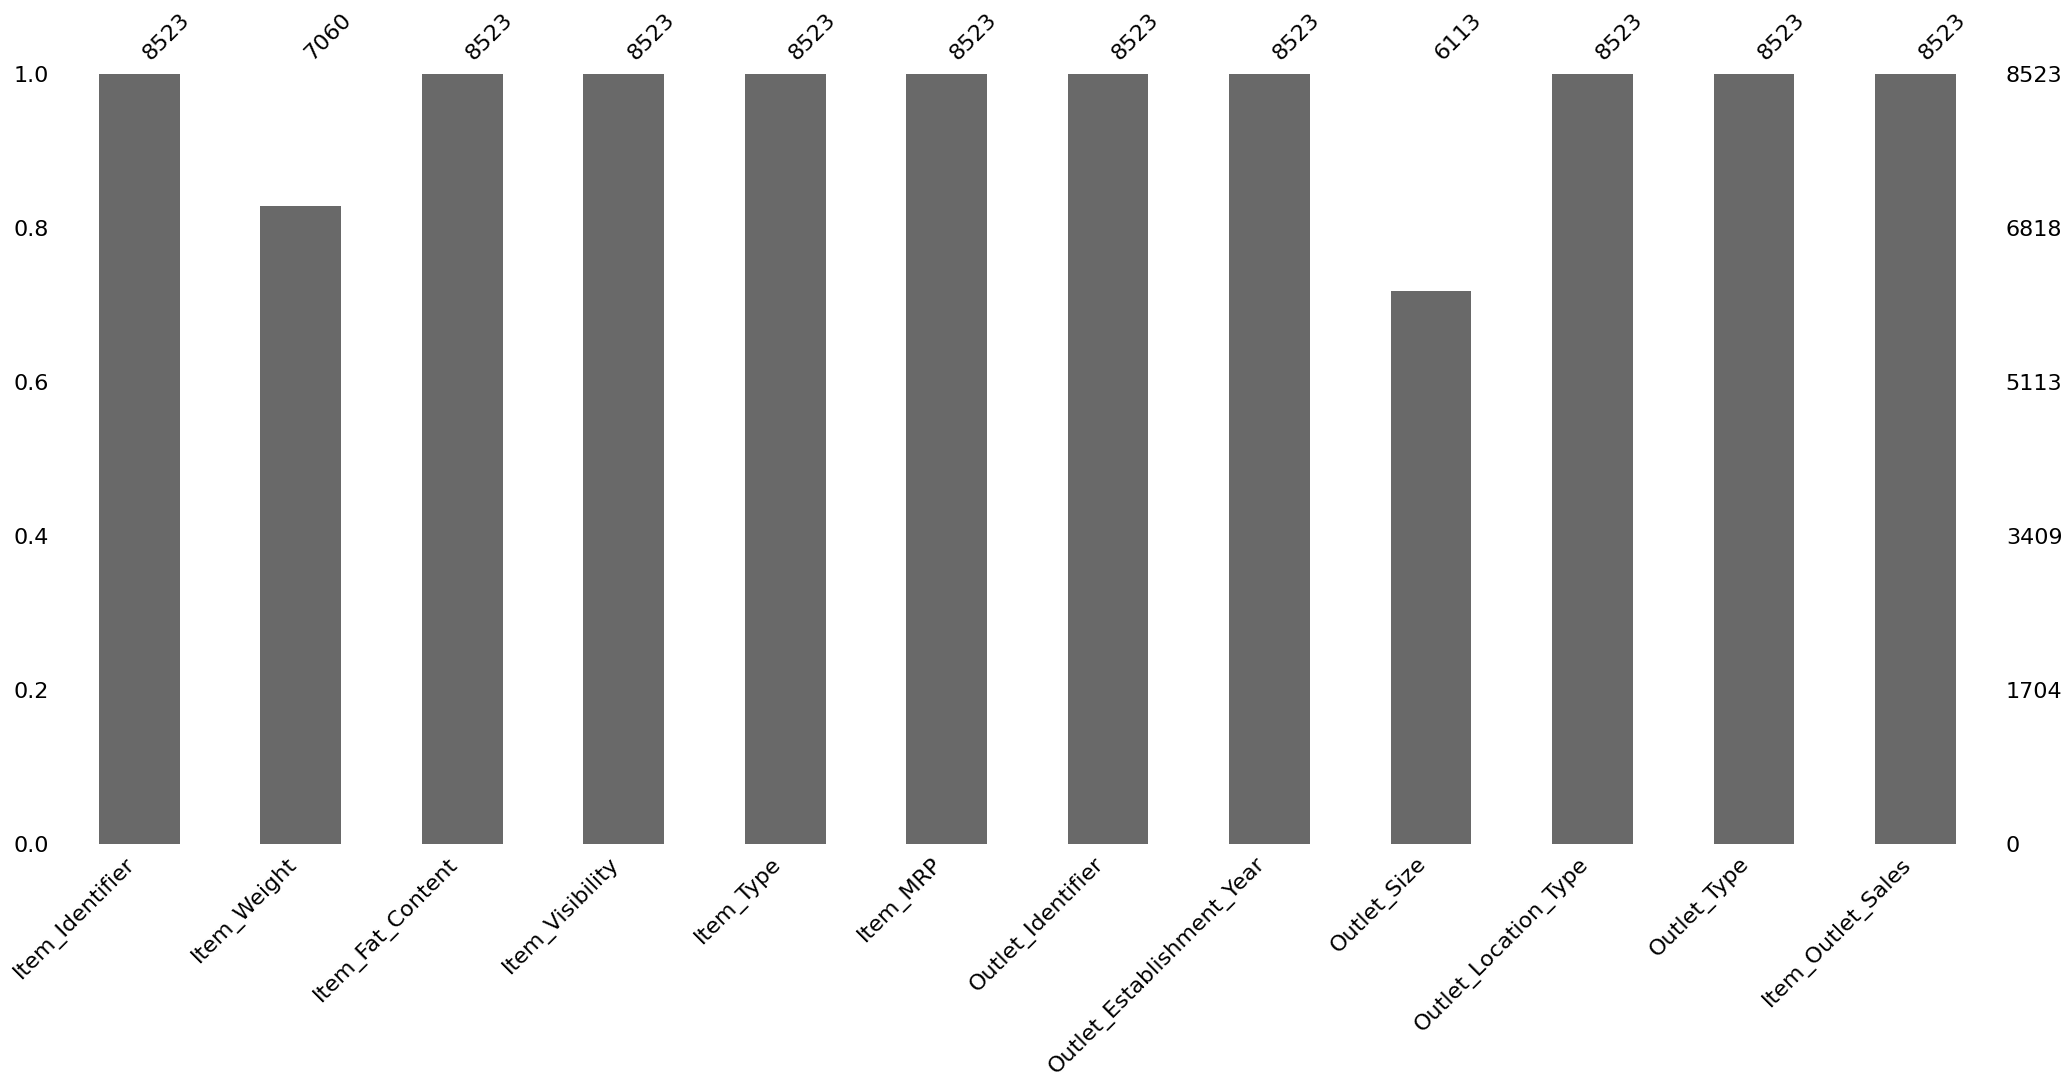

In [18]:
msno.bar(df);

##### **Address the Null Values**


###### **Null Values in Categorical Columns**

In [19]:
# save list of categorical column name.
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


#### **Data Consistency**

#####  **Data Consistency- Categorical Columns**




In [21]:
# Item_Fat_Content- fix the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat' , 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg' , 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

######  **Replacing Data in Categorical Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Replace missing values with the value 'Unknown'**
 - pro: This typically will not create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.

- **Impute missing values using the most frequent value, 'mode', value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This may create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.


In [22]:
#Replace missing categorical column values with 'Unknown'

df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')


- Replacing with 'Unknown' since, about 28% of the data is missing. This is to avoid any bias, or significant loss of data.

##### **Data Consistency- Numerical Columns**

In [23]:
# Have list of numerical column name.
numerical_col = df.select_dtypes(['int', 'float']).columns
numerical_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value Counts for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845

###### **Replacing Data in Numeric Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Impute missing values using the 'mean' value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
 - con: This will not factor correlations between features.

- **Impute missing values using the 'median' value of the column**
 - pro: This typically works well with small numeric datasets.
 - pro: This is less affected by outliers than strategy = 'mean'.
 - con: This will not factor correlations between features.

In [25]:
import statistics as stat
weight_median = df['Item_Weight'].median()

In [26]:
# Impute missing values using 'median' value
df['Item_Weight'] = df['Item_Weight'].fillna(weight_median)


- Replacing with 'median' value since, about 17% of the data is unknown- to avoid any bias, or losing valueable data. Using Median to replace missing values since it is less affected by skew and outliers.

In [27]:
#checking Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [28]:
#Descriptive data for numerical columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#### Summary Statistic for Numerical Columns
For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [29]:
df.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

### **Categorical Columns**

In [30]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


#### **'Item_Fat_Content' column**

In [31]:
## Display the value counts for the column
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
## Display the descriptive statistics for the column
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

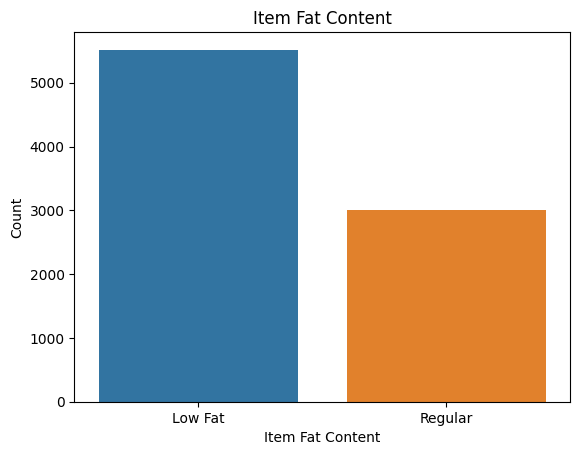

In [33]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x ='Item_Fat_Content')
#Set title, and axis label name
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Count')
ax.set_title('Item Fat Content');

Interpretation:
  - Low Fat Content has a higher count of instances compared to Regular Fat Content.

#### **'Item_Type' column**

In [34]:
## Display the descriptive statistics for the column
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [35]:
## Display the value counts for the column in descending order
count_item_type = df['Item_Type'].value_counts().sort_values(ascending = False)
count_item_type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

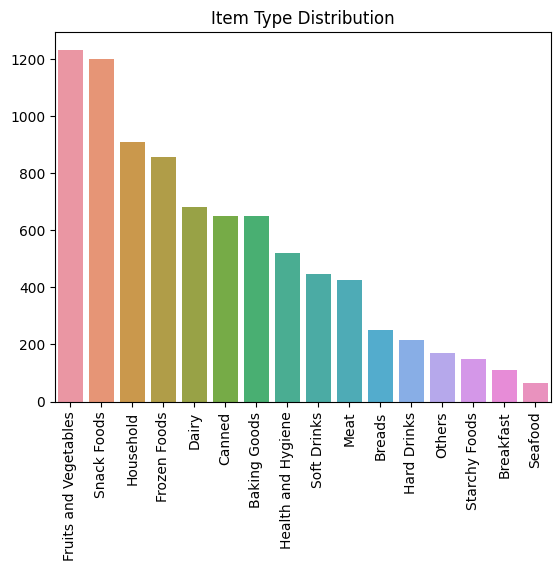

<Figure size 1800x800 with 0 Axes>

In [36]:
#Define ax using seaborn.barplot()
ax = sns.barplot(data=df, x= count_item_type.index, y= count_item_type.values)
plt.figure(figsize = (18,8));

#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 90)
#Set the title
ax.set_title("Item Type Distribution")
#set x-axis and y-axis labels
ax.set_xlabel = ('Item Type')
ax.set_ylabel = ('Count');

Interpretation:
  - Fruits and Vegetables has the highest count of instances.
  - Seafood has the lowest count of instances.

#### **'Outlet_Identifier' column**

In [37]:
## Display the value counts for the column
count_outlet_identifier = df['Outlet_Identifier'].value_counts().sort_values( ascending = False)
count_outlet_identifier


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [38]:
## Display the descriptive statistics for the column
df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

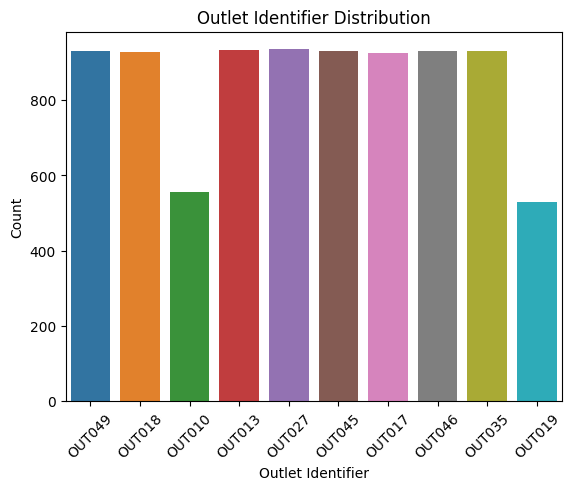

In [39]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Identifier')
#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 45)
#Set title, and axis label name
ax.set_xlabel('Outlet Identifier')
ax.set_ylabel('Count')
ax.set_title('Outlet Identifier Distribution');

Interpretation:
  - OUT027 has the highest count of instances.
  - OUT019 has the lowest count of instances.

#### **'Outlet_Size' column**

In [40]:
## Display the value counts for the column
count_outlet_size = df['Outlet_Size'].value_counts()
count_outlet_size

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [41]:
## Display the descriptive statistics for the column
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

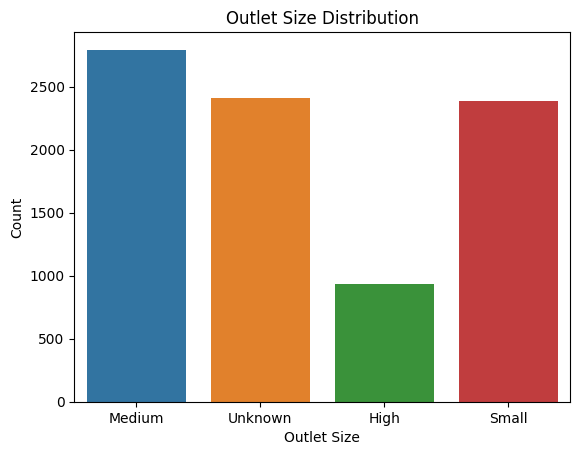

In [42]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Size')
#Set title, and axis label name
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')
ax.set_title('Outlet Size Distribution');

Interpretation:
- Medium Outlet Size has the highest count of instances.
- High Outlet Size has the lowest count of instances.

#### **'Outlet_Location_Type' column**

In [43]:
## Display the value counts for the column
df['Outlet_Location_Type'].value_counts().sort_values()

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

In [44]:
## Display the descriptive statistics for the column
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

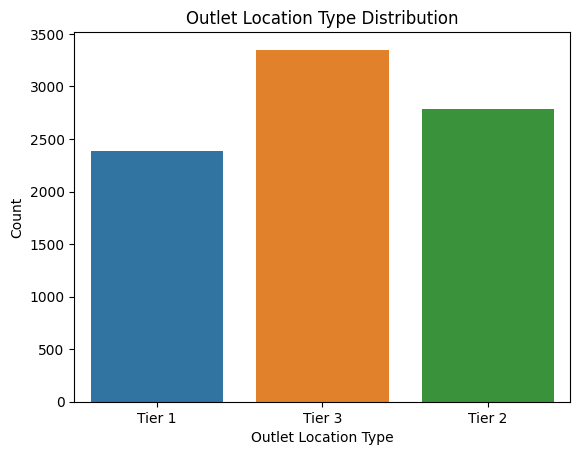

In [45]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Location_Type')
#Set title, and axis label name
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Count')
ax.set_title('Outlet Location Type Distribution');

Interpretation:
  - Tier 3 Outlet Location Type has the highest count of instances.
  - Tier 1 Outlet Location Type has the lowest count of instances.


#### **'Outlet_Type' column**

In [46]:
## Display the value counts for the column
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [47]:
## Display the descriptive statistics for the column
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

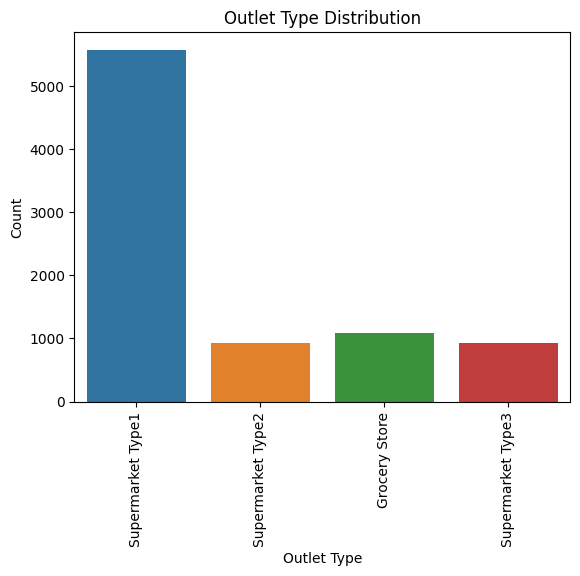

In [48]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Type')
#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 90)
#Set title, and axis label name
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Count')
ax.set_title('Outlet Type Distribution');

Interpretation:
  - Supermarket Type 1 has the highest count of instances.
  - Supermarket Type 2 has the lowest count of instances.


### **Numerical Columns**

In [49]:
## Display the descriptive statistics for the numeric columns
df.describe(include=('number'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#### **'Item_Weight' column**

In [50]:
### Display the value counts for the column
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [51]:
## Display the descriptive statistics for the column
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

- **'Item Weight' Histogram**

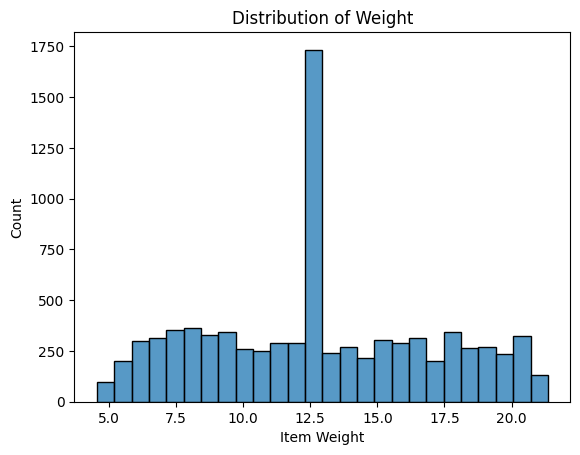

In [52]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Weight')




#Set title name and axis names
ax.set_title('Distribution of Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel("Count");

'Item Weight' Histogram Interpretation:
  - Values range from 4.55 to 21.35.
  - The median value is 12.6.
  - The data is very slightly negatively skewed.


- **'Item Weight' Boxplot**

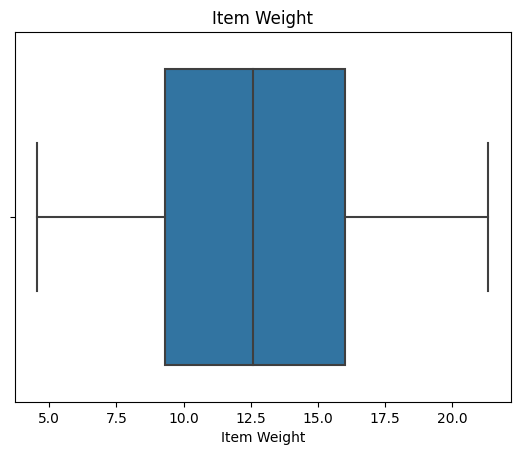

In [53]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Weight')

## Set the Title
ax.set_title('Item Weight')
ax.set_xlabel('Item Weight');

'Item Weight' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Item_Visibility' column**

In [54]:
### Display the value counts for the column
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [55]:
## Display the descriptive statistics for the column
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

- **'Item Visibility' Histogram**

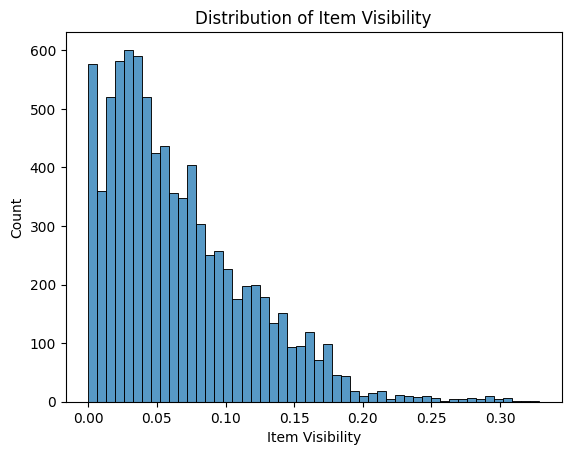

In [56]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Visibility')




#Set title name and axis names
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Item Visibility')
ax.set_ylabel("Count");

'Item Visibility' Histogram Interpretation:
 - Values range from 0.000 to 0.328.
 - The median value is 0.053.
 - The data is very positively skewed.



- **'Item Visibility' Boxplot**

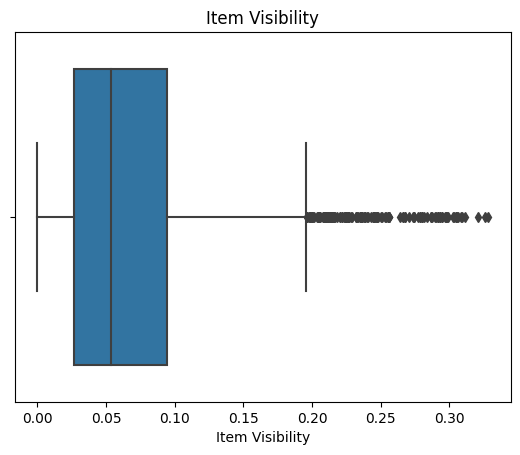

In [57]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')

## Set the Title ans x-axis label
ax.set_title('Item Visibility')
ax.set_xlabel('Item Visibility');


'Item Visibility' Boxplot Interpretation:
 - The data is very positively skewed.
 - Outliers are noted on the high side.


#### **'Item_MRP' column**

In [58]:
### Display the value counts for the column
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [59]:
## Display the descriptive statistics for the column
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

- **'Item MRP' Histogram**

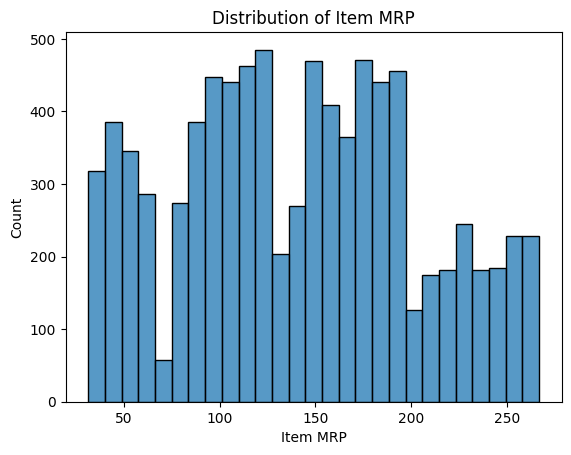

In [60]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_MRP')


#Set title name and axis names
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Item MRP')
ax.set_ylabel("Count");

'Item MRP' Histogram Interpretation:
  - Values range from  31.29 to 266.88.
  - The median value is 143.01.
  - The data is very slightly negatively skewed.


**'Item MRP' Boxplot**

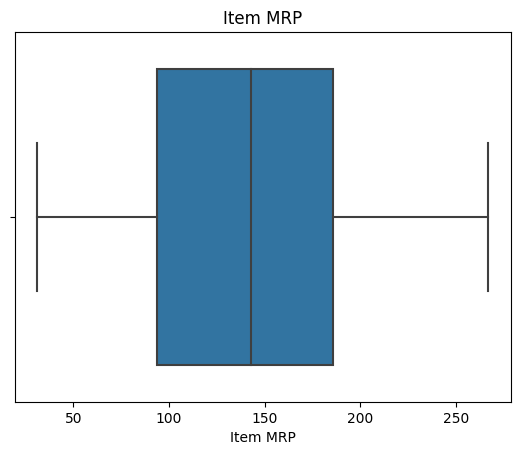

In [61]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_MRP')

## Set the Title
ax.set_title('Item MRP')
ax.set_xlabel('Item MRP');

'Item MRP' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Outlet_Establishment_Year' column**

In [62]:
### Display the value counts for the column
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [63]:
## Display the descriptive statistics for the column
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

**'Outlet Establishment Year' Histogram**

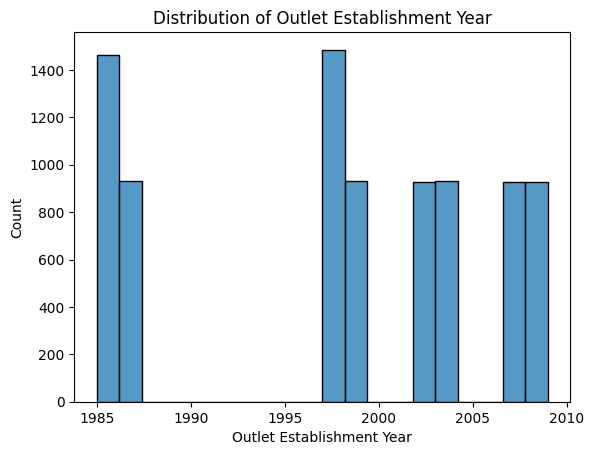

In [64]:
## Define a MatplotLib ax object using seaborn.histplot()
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Outlet_Establishment_Year', bins = (20))


#Set title name and axis names
ax.set_title('Distribution of Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel("Count");

'Outlet Establishment Year' Histogram Interpretation:
  - Values range from  1985 to 2009.
  - The median value is 1999.
  - The data is very slightly negatively skewed.


**'Outlet Establishment Year' Boxplot**

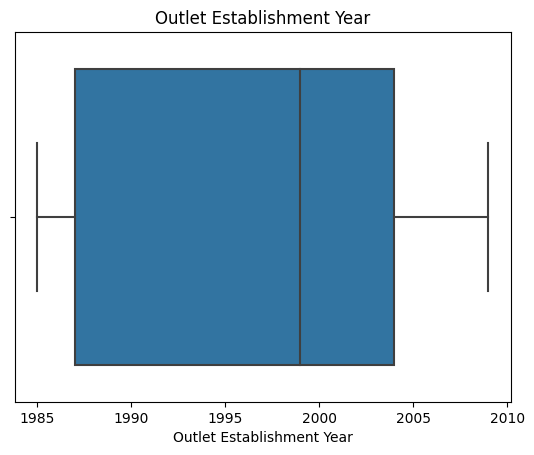

In [65]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Outlet_Establishment_Year')

## Set the Title
ax.set_title('Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year');

'Outlet Establishment Year' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Item_Outlet_Sales' column**

In [66]:
### Display the value counts for the column
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [67]:
## Display the descriptive statistics for the column
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**'Item Outlet Sales' Histogram**

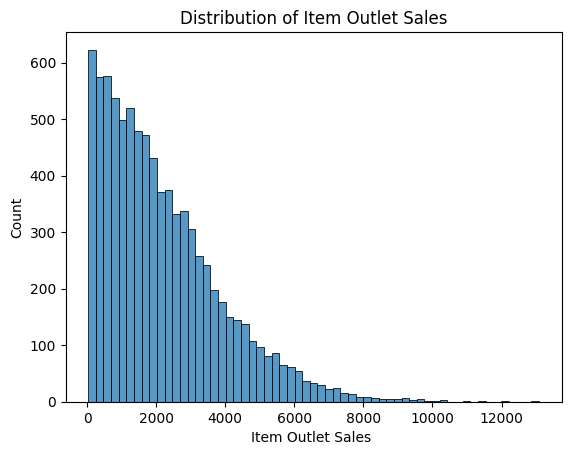

In [68]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Outlet_Sales')


#Set title name and axis names
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales ')
ax.set_ylabel("Count");

'Item Outlet Sales' Histogram Interpretation:
  - Values range from 33.29 to 13086.96.
  - The median value is 1794.33.
  - The data is very positively skewed


**'Item Outlet Sales' Boxplot**

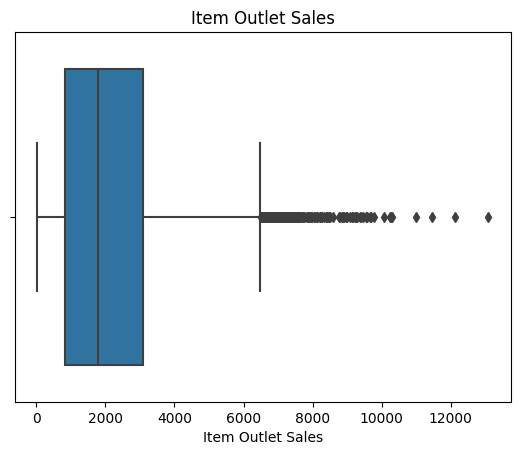

In [69]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Outlet_Sales')

## Set the Title
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales');

'Item Outlet Sales' Boxplot Interpretation:
  - The data is very positively skewed .
  - Outliers are noted on the high end.

### **Correlation**

#### .corr() method

In [70]:
#To check all numeric features in the dataframe for correlations, use df.corr()
corr = df.corr()

corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


#### Heatmap of Correlations

- Heatmap of correlations will display any correlation between numeric features.

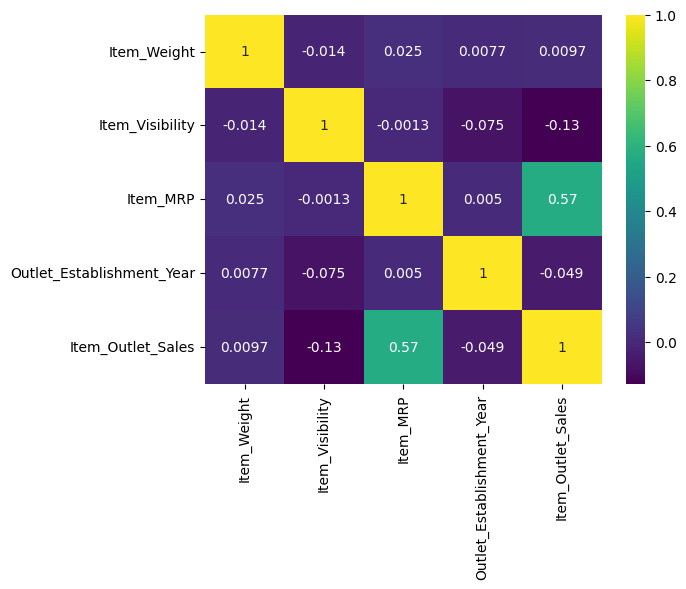

In [71]:
##Define Matplotlib fix and ax objects using plt.subplots()
## Use figsize= to set the size of the figure
fig, ax = plt.subplots()

##Define Matplotlib ax object using sns.heatmap()
##Use cmap= to define the color map
##Use annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap = 'viridis', annot = True);

Interpretation of Heatmap:
  - The highest correlation is between Item_MRP and Item_Outlet Sales

## **Explanatory Data Analysis**

##### **Impact of Item MRP on Item Outlet Sales**

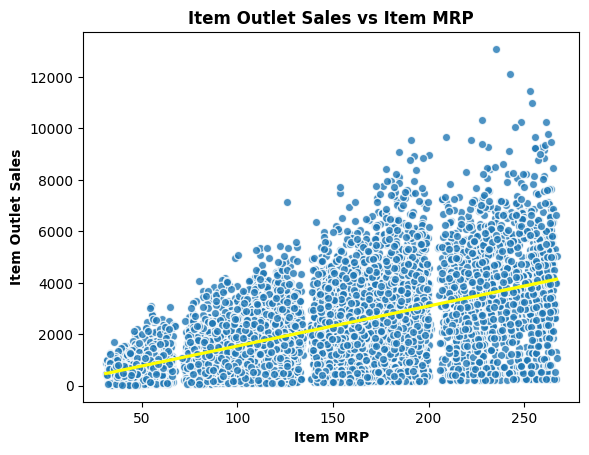

In [72]:
## Define a MatplotLib ax object using sns.regplot()

scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data = df,
                 x ='Item_MRP',
                 y = 'Item_Outlet_Sales',
                 scatter_kws= scatter_kws,
                 line_kws = {'color':'yellow'})
## Set the Title
ax.set_title('Item Outlet Sales vs Item MRP', fontsize=12, fontweight = 'bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize=10, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize=10, fontweight = 'bold');

- Prediction: Positive Correlation- Item MRP Influences Item Outlet Sales.

##### **Impact of Outlet Size on Outlet Sales**

In [73]:
count_outlet_size = df['Outlet_Size'].value_counts()
count_outlet_size

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

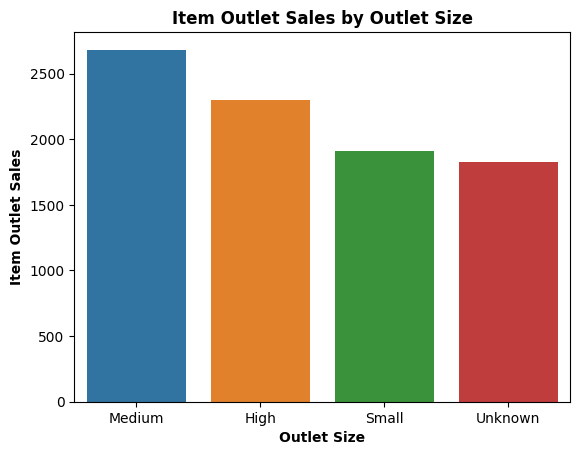

In [74]:
## Define label_order
outlet_size_sales_mean = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
outlet_size_sales_mean
## Define a MatplotLib ax object using sns.barplot()
fig, ax = plt.subplots()
ax = sns.barplot(data = df,
                 x ='Outlet_Size',
                 y = 'Item_Outlet_Sales',
                 order = outlet_size_sales_mean.index,
                 errorbar = None)
## Set the Title
ax.set_title('Item Outlet Sales by Outlet Size', fontsize=12, fontweight = 'bold')
# Set Axes Labels
ax.set_xlabel('Outlet Size', fontsize=10, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize=10, fontweight = 'bold');

- Prediction: Medium Outlets contribute the most towards Outlet Sales, while Unknown Outlet Size contribute the least.

##### **Impact of Item Type on Outlet Sales**

In [75]:
## Display the descriptive statistics for the column
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [76]:
#Item type sales in percent using groupby
total_item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
total_sales = df["Item_Outlet_Sales"].sum()
percent_item_type_sales = ((total_item_type_sales / total_sales)*100).sort_values(ascending=False)
percent_item_type_sales

Item_Type
Fruits and Vegetables    15.168849
Snack Foods              14.699412
Household                11.056317
Frozen Foods              9.820464
Dairy                     8.189897
Canned                    7.767962
Baking Goods              6.807148
Health and Hygiene        5.622038
Meat                      4.935503
Soft Drinks               4.802817
Breads                    2.975813
Hard Drinks               2.462430
Starchy Foods             1.890156
Others                    1.750930
Breakfast                 1.249515
Seafood                   0.800749
Name: Item_Outlet_Sales, dtype: float64

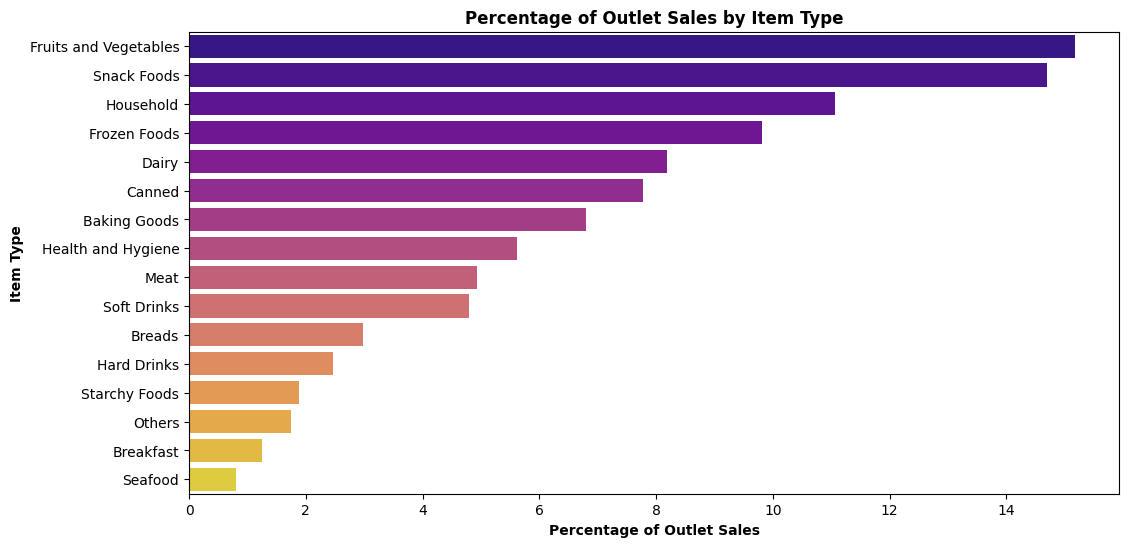

In [77]:
percent_item_type_sales = ((total_item_type_sales / total_sales) * 100).reset_index()

## Define a Matplotlib ax object using sns.barplot()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=percent_item_type_sales,
                 y='Item_Type',
                 x='Item_Outlet_Sales',
                 order=percent_item_type_sales.sort_values('Item_Outlet_Sales', ascending=False)['Item_Type'],
                 errorbar=None,
                 palette = 'plasma')
## Set the Title
ax.set_title('Percentage of Outlet Sales by Item Type', fontsize=12, fontweight='bold')
# Set Axes Labels
ax.set_ylabel('Item Type', fontsize=10, fontweight='bold')
ax.set_xlabel('Percentage of Outlet Sales', fontsize=10, fontweight='bold');


- Prediction: Fruits and Vegetables (15%) exhibit the highest sales, whereas Seafood (0.8%) demonstrates the lowest sales.
  - The top three Items Types to impact most on Item Outlet sales are:
      - Fruits and Vegetables: 15%
      - Snack Foods: 14%
      - Household: 11%

##### Impact of Outlet Location on Outlet Sales

In [78]:
## Display the descriptive statistics for the column
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [79]:
location_sales= df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)
location_sales_percent = ((location_sales / total_sales)*100)
location_sales_percent

Outlet_Location_Type
Tier 3    41.077409
Tier 2    34.813996
Tier 1    24.108595
Name: Item_Outlet_Sales, dtype: float64

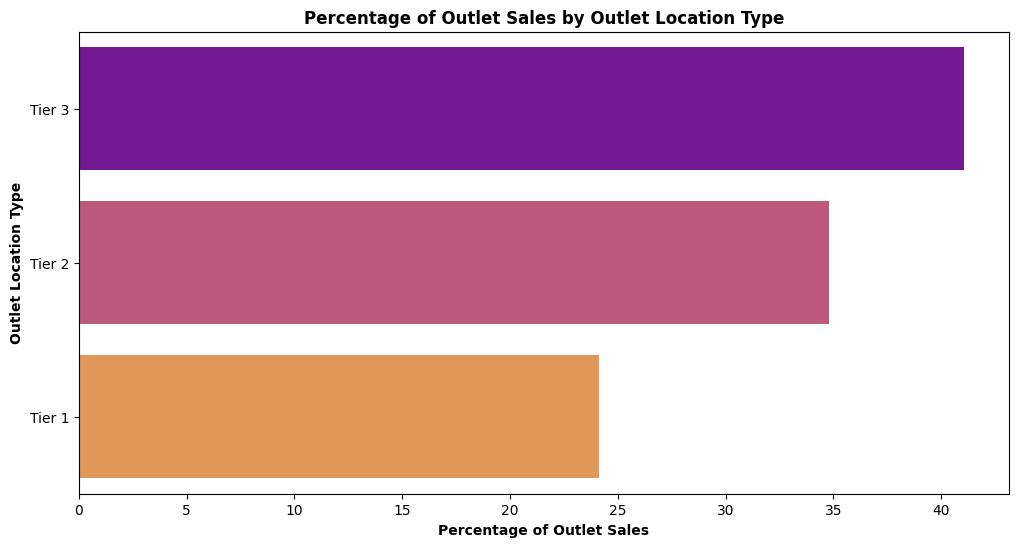

In [80]:
location_sales_percent = ((location_sales / total_sales)*100).reset_index()
## Define a Matplotlib ax object using sns.barplot()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=location_sales_percent,
                 y='Outlet_Location_Type',
                 x='Item_Outlet_Sales',
                 order=location_sales_percent.sort_values('Item_Outlet_Sales', ascending=False)['Outlet_Location_Type'],
                 errorbar=None,
                 palette = 'plasma')
## Set the Title
ax.set_title('Percentage of Outlet Sales by Outlet Location Type', fontsize=12, fontweight='bold')
# Set Axes Labels
ax.set_ylabel('Outlet Location Type', fontsize=10, fontweight='bold')
ax.set_xlabel('Percentage of Outlet Sales', fontsize=10, fontweight='bold');

- Prediction: Tier 3 Outlet Location Types make the biggest contribution to total sales, with 41% of the sales coming from these outlets. On the other hand, Tier 1 Outlet Location Types have the smallest contribution, accounting for only 24% of the total sales.

## **Preprocessing**

In [81]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output='pandas')
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## setting random state for reproducibility
SEED = 42
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'


In [82]:
#load data
file = "Data/sales_predictions_2023.csv"
dfp = pd.read_csv(file)
dfp.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [83]:
dfp.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [84]:
#Dropping unwanted columns
drop_cols =["Item_Identifier", "Item_Weight", "Outlet_Establishment_Year", "Item_Fat_Content"]
dfp.drop(columns= drop_cols, axis=1, inplace=True)

In [85]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_Type             8523 non-null   object 
 2   Item_MRP              8523 non-null   float64
 3   Outlet_Identifier     8523 non-null   object 
 4   Outlet_Size           6113 non-null   object 
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(5)
memory usage: 532.8+ KB


### Train-Test-Split

#### Define X and y

In [86]:
# Defining X and y
X= dfp.drop(columns="Item_Outlet_Sales").copy()

y= dfp["Item_Outlet_Sales"].copy()

In [87]:
X.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store
4,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1


#### Train-Test-Split

In [88]:
#performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)
dfp.head()


,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


#### Numeric Pipeline

In [89]:
#list of numeric column names 
num_cols = make_column_selector(dtype_include="number")
print(num_cols(X_train))
# # Initialize the preprocessing numericals
# imputer
impute_mean = SimpleImputer(strategy='mean')
# tuple for column transformer
num_pipe = make_pipeline(impute_mean)
num_tuple = ('numeric',num_pipe, num_cols)
num_tuple

['Item_Visibility', 'Item_MRP']


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x13760edf0>)

#### Categorical Pipeline

In [90]:
# list of categorical and ordinal column names 
cat_cols = make_column_selector(dtype_include="object")
# Imputer for Categoricals
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
# Instantiating for Categoricals
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# tuple for column transformer
cat_pipe = make_pipeline(impute_na, encoder)
# tuple for column transformer
cat_tuple = ("categorical", cat_pipe, cat_cols)
cat_tuple


('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x1376286a0>)

#### Preprocessor

In [91]:
preprocessor = make_column_transformer((num_pipe, num_cols),
                                      (cat_pipe, cat_cols), 
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13760edf0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1376286a0>)],
                  verbose_feature_names_out=False)

In [92]:
# Make X_train_df and X_test_df, dataframe verisons of processed X_train/X_test.

preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.029565,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.000000,179.7660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,0.158716,157.2946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,0.014628,82.3250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,0.016645,120.9098,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.286345,139.1838,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.117575,75.6670,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,0.018944,237.3590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,0.054363,117.9466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## **Modeling - Linear Regression**

In [93]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    # Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")


## Baseline LinReg



In [94]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.36,"1,139.46"
Test,0.57,803.88,"1,092.08"


### Extracting and Visualizing Coefficients

#### def `get_coefficients`

In [95]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [96]:
coeffs = get_coefficients(lin_reg)
coeffs.sort_values()

Outlet_Type_Grocery Store         -856.722052
Outlet_Identifier_OUT010          -470.601774
Item_Visibility                   -408.321473
Outlet_Identifier_OUT019          -386.120278
Outlet_Size_NA                    -295.838991
intercept                         -233.892659
Outlet_Location_Type_Tier 1       -219.161932
Outlet_Type_Supermarket Type2     -178.355099
Outlet_Identifier_OUT018          -178.355099
Item_Type_Dairy                   -121.428978
Outlet_Identifier_OUT049          -106.411126
Outlet_Size_Small                 -100.025462
Item_Type_Soft Drinks              -69.221876
Item_Type_Others                   -68.346375
Item_Type_Breads                   -40.299308
Item_Type_Household                -35.403792
Item_Type_Snack Foods              -35.034087
Item_Type_Hard Drinks              -23.900475
Item_Type_Meat                     -13.877695
Item_Type_Health and Hygiene       -13.182755
Item_Type_Frozen Foods             -11.553922
Item_Type_Baking Goods            

In [97]:
# Custom function for Annotating HBars
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [98]:
#Custom Function for Coefficiant Visualization 
def plot_coeffs(coeffs, top_n=None, figsize=(8,6), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    fig, ax = plt.subplots()

    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
   

    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    plt.tight_layout();
    return ax

In [99]:
# Saving the coefficients array into a pandas Series
coeffs = pd.Series(lin_reg.coef_, index=preprocessor.get_feature_names_out())
coeffs

Item_Visibility                   -408.321473
Item_MRP                            15.715704
Item_Type_Baking Goods              -9.365063
Item_Type_Breads                   -40.299308
Item_Type_Breakfast                 46.145087
Item_Type_Canned                    18.490839
Item_Type_Dairy                   -121.428978
Item_Type_Frozen Foods             -11.553922
Item_Type_Fruits and Vegetables     36.320119
Item_Type_Hard Drinks              -23.900475
Item_Type_Health and Hygiene       -13.182755
Item_Type_Household                -35.403792
Item_Type_Meat                     -13.877695
Item_Type_Others                   -68.346375
Item_Type_Seafood                  313.887885
Item_Type_Snack Foods              -35.034087
Item_Type_Soft Drinks              -69.221876
Item_Type_Starchy Foods             26.770397
Outlet_Identifier_OUT010          -470.601774
Outlet_Identifier_OUT013             5.259037
Outlet_Identifier_OUT017           158.884974
Outlet_Identifier_OUT018          

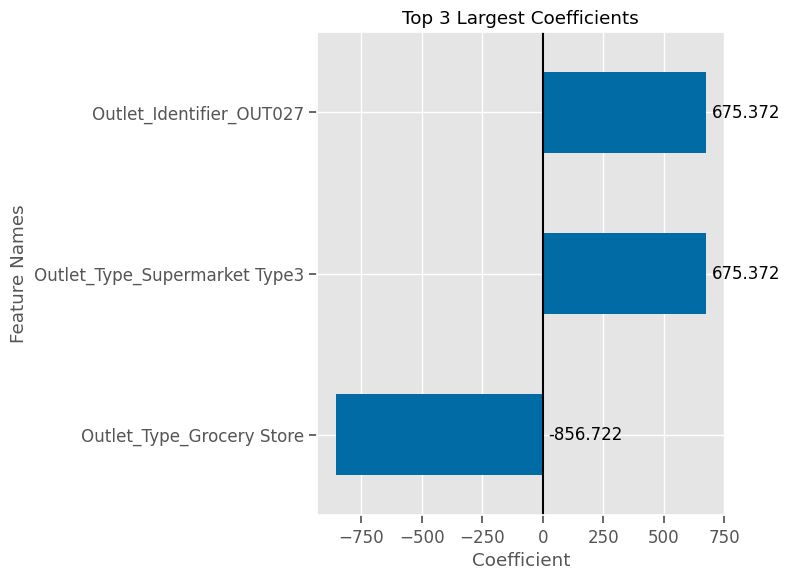

In [100]:
#Extract and visualize the coefficients that your model determined
## Select the top 3 most impactful features and interpret their coefficients in plain English.
ax = plot_coeffs(coeffs, top_n=3, annotate=True);

#### Interpreting the Top 3 impactful features and their coefficients

- `Outlet_Type_Supermarket Type3` feature has a significant positive impact. A Tier 3 outlet will produce 675 revenue for it's outlet. This could mean that having an outlet in a tier 3 location is associated with higher sales and profits.

- `Outlet_Identifier_OUT27` feature has a significant positive impact. This outlet seems to generate 675 in revenue. 

- `Outlet_Type_Grocery Store` feature has a significant negative impact. This indicates that Outlets that are categorized as Grocery Stores negatively impact on revenue generated by a value of 876.

#### Saving Linear Regression Plot

In [101]:
#save the coefficient figure as a file
fig = ax.get_figure()
fig.savefig("Images/plot_linreg_coefficients.png", dpi=100)

## Model 1: Tree-Based Model

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.36,"1,139.46"
Test,0.57,803.88,"1,092.08"


In [103]:
#Defining a Function for Feature Importance
def get_importances(model, feature_names=None, name="Feature Importance",
                    sort=False, ascending=True):
    # checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    # Saving the feature importances
    importances = pd.Series(model.feature_importances_, index=feature_names, name=name)
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [104]:
#Create a custom function to plot our importances
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        # sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        # sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    # plotting top N importances
    fig2, ax = plt.subplots()
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    plt.tight_layout();
    # return ax in case want to continue to update/modify figure
    return ax

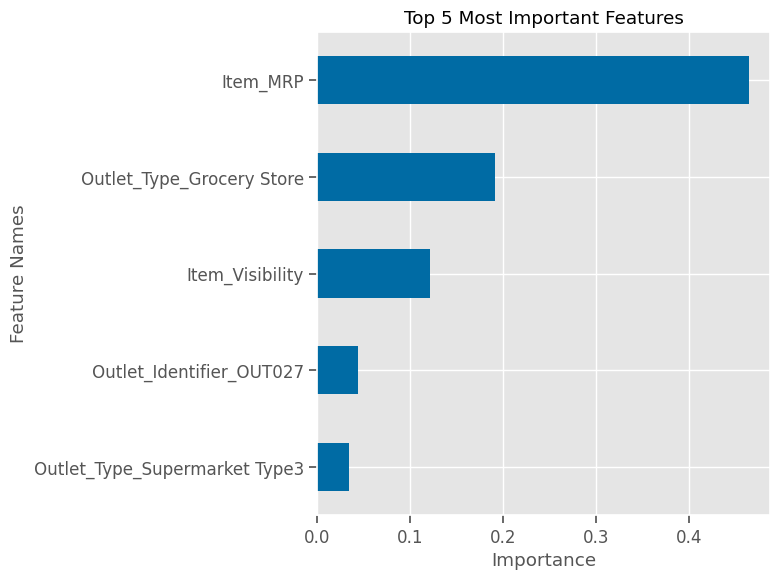

In [105]:
# Saving the feature importances
importances = get_importances(rf)
feature_importance_plot = plot_importance(importances, top_n=5);

In [106]:
importances.sort_values(ascending=False).head()

Item_MRP                         0.464371
Outlet_Type_Grocery Store        0.191730
Item_Visibility                  0.121682
Outlet_Identifier_OUT027         0.043611
Outlet_Type_Supermarket Type3    0.034052
Name: Feature Importance, dtype: float64

#### Top 5 most important features

Features with higher importances have a more significant impact on the model's predictions.

- The top 5 most important features for this model are:
    1) Item_MRP: maximum retail price of an item has the highest importance score of 0.464
    2) Outlet Type Grocery Store: has the second highest importance score of 0.192
    3) Item_Visibility: has the third highest importance score of 0.122
    4) Outlet_Type_Supermarket Type3: has the forth highest importance score of 0.0388
    5) Outlet_Identifier_OUT027: has the fifth highest importance score of 0.0387


In [107]:
#save the 5 most important features as a file
fig_rf = feature_importance_plot.get_figure()
fig_rf.savefig("Images/plot_rf_important_features.png", dpi=100)


## **Serialize Best Models with Joblib**

### Saving & Loading

In [108]:
# saving variables for next lesson/notebook
import joblib
# creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression': lin_reg,
         'RandomForest':rf}
joblib.dump(export, 'Data/best-models.joblib')

['Data/best-models.joblib']

## **Local Explanations**

In [109]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

- Mean Item Outlet Sales is at about 2181. I will use this value to set values for low sales and high sales

In [110]:
#Defining low_sales and high_sales
low_sales = dfp['Item_Outlet_Sales']<2181
high_sales = dfp['Item_Outlet_Sales']>2181
dfp[low_sales]

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...
8516,0.118661,Others,58.7588,OUT018,Medium,Tier 3,Supermarket Type2,858.8820
8519,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850
8520,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


### Filtering based on Item_MRP

In [111]:
## Display the descriptive statistics for the numeric columns
dfp.describe(include=('number'))

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914
std,0.051598,62.275067,1706.499616
min,0.000000,31.290000,33.290000
25%,0.026989,93.826500,834.247400
50%,0.053931,143.012800,1794.331000
75%,0.094585,185.643700,3101.296400
max,0.328391,266.888400,13086.964800


- Item_MRP
    - 25% = 93
    - 50% = 143
    - 75% = 185
    
- I will set high and low Item_MRP values based on the 75%. 

In [112]:
#Defining high_mrp and low_mrp
high_mrp = dfp["Item_MRP"] > 185
low_mrp = dfp["Item_MRP"] < 185

#### High MRP

In [113]:
# Creating groups
## High Sale-High MRP
fgrp_high_sales_high_mrp = high_sales & high_mrp
print(f'There are {fgrp_high_sales_high_mrp.sum()} outlets that generate high outlet sales, with high MRP prices.')


There are 1543 outlets that generate high outlet sales, with high MRP prices.


In [114]:
# Creating groups
## Low Sale-High MRP
fgrp_low_sales_high_mrp = low_sales & high_mrp
print(f'There are {fgrp_low_sales_high_mrp.sum()} outlets that generate low outlet sales, with high MRP prices.')

There are 627 outlets that generate low outlet sales, with high MRP prices.


- As we can see the High MRP group has:
    - 1543 outlets with high item outlet sales
    - 627 outlets with low item outlet sales

#### Low MRP

In [115]:
# Creating groups
## Low Sale-Low MRP
fgrp_low_sales_low_mrp = low_sales & low_mrp
print(f'There are {fgrp_low_sales_low_mrp.sum()} outlets that generate low outlet sales, with low MRP prices.')


There are 4367 outlets that generate low outlet sales, with low MRP prices.


In [116]:
# Creating groups
## High Sale-Low MRP
fgrp_high_sales_low_mrp = high_sales & low_mrp
print(f'There are {fgrp_high_sales_low_mrp.sum()} outlets that generate high outlet sales, with low MRP prices.')


There are 1986 outlets that generate high outlet sales, with low MRP prices.


- As we can see the Low MRP group has:
    - 1986 outlets with high item outlet sales
    - 4367 outlets with low item outlet sales

### Select one example of each for further exploration

#### High MRP: High Sales

In [117]:
## Selecting indices of Group High MRP with high sales
idx_examples_fgrp_high_sales_high_mrp = dfp[fgrp_high_sales_high_mrp].index
idx_examples_fgrp_high_sales_high_mrp

Int64Index([   0,    9,   19,   20,   32,   40,   42,   43,   47,   53,
            ...
            8485, 8491, 8493, 8496, 8502, 8506, 8508, 8510, 8511, 8518],
           dtype='int64', length=1543)

In [118]:
## selecting index of final example
i_grp_high_sales_high_mrp = 8485  

example_grp_high_sales_high_mrp = dfp.loc[i_grp_high_sales_high_mrp]
example_grp_high_sales_high_mrp

Item_Visibility                  0.043792
Item_Type                     Soft Drinks
Item_MRP                          189.053
Outlet_Identifier                  OUT027
Outlet_Size                        Medium
Outlet_Location_Type               Tier 3
Outlet_Type             Supermarket Type3
Item_Outlet_Sales                6261.849
Name: 8485, dtype: object

#### High MRP: Low Sales

In [119]:
## Selecting indices of Group High MRP with low sales
idx_examples_fgrp_low_sales_high_mrp = dfp[fgrp_low_sales_high_mrp].index
idx_examples_fgrp_low_sales_high_mrp

Int64Index([  14,   22,   49,   65,   67,   83,   96,   99,  108,  110,
            ...
            8375, 8410, 8419, 8428, 8435, 8449, 8458, 8477, 8505, 8509],
           dtype='int64', length=627)

In [120]:
## selecting index of final example
i_grp_low_sales_high_mrp = 8375  

example_grp_low_sales_high_mrp = dfp.loc[i_grp_low_sales_high_mrp]
example_grp_low_sales_high_mrp

Item_Visibility                   0.104784
Item_Type               Health and Hygiene
Item_MRP                          266.0226
Outlet_Identifier                   OUT019
Outlet_Size                          Small
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                 528.6452
Name: 8375, dtype: object

#### Low MRP: Low Sales

In [121]:
## Selecting indices of Group Low MRP with low sales
idx_examples_fgrp_low_sales_low_mrp = dfp[fgrp_low_sales_low_mrp].index
idx_examples_fgrp_low_sales_low_mrp

Int64Index([   1,    2,    3,    4,    5,    6,    8,   10,   12,   13,
            ...
            8501, 8507, 8513, 8514, 8515, 8516, 8519, 8520, 8521, 8522],
           dtype='int64', length=4367)

In [122]:
## selecting index of final example
i_grp_low_sales_low_mrp = 8501  

example_grp_low_sales_low_mrp = dfp.loc[i_grp_low_sales_low_mrp]
example_grp_low_sales_low_mrp

Item_Visibility                  0.005998
Item_Type                     Snack Foods
Item_MRP                         100.4358
Outlet_Identifier                  OUT017
Outlet_Size                           NaN
Outlet_Location_Type               Tier 2
Outlet_Type             Supermarket Type1
Item_Outlet_Sales                1508.037
Name: 8501, dtype: object

#### Low MRP: High Sales

In [123]:
## Selecting indices of Group Low MRP with High sales
idx_examples_fgrp_high_sales_low_mrp = dfp[fgrp_high_sales_low_mrp].index
idx_examples_fgrp_high_sales_low_mrp

Int64Index([   7,   11,   18,   21,   24,   31,   35,   36,   46,   48,
            ...
            8487, 8488, 8492, 8495, 8497, 8499, 8503, 8504, 8512, 8517],
           dtype='int64', length=1986)

In [124]:
## selecting index of final example
i_grp_high_sales_low_mrp = 8487

example_grp_high_sales_low_mrp = dfp.loc[i_grp_high_sales_low_mrp]
example_grp_high_sales_low_mrp

Item_Visibility                  0.037006
Item_Type                     Soft Drinks
Item_MRP                         164.7526
Outlet_Identifier                  OUT027
Outlet_Size                        Medium
Outlet_Location_Type               Tier 3
Outlet_Type             Supermarket Type3
Item_Outlet_Sales                4111.315
Name: 8487, dtype: object

##### I picked these examples for two reasons:

- **Low Prices, High Sales**: Surprised! Normally, when items are cheap, a store sells a lot of them. But I chose this example because it's different. Outlet027 sells a lot despite having low prices.

- **High Prices, High Sales**: Confirmation. Usually, expensive items sell well. This example shows that it's true. And it's also from Outlet027, which consistently has the highest sales.

## Visualization

#### Data Prep for SHAP

In [125]:
#Import SHAP
import shap

#Initialize JS
shap.initjs()

#### SHAP explainer

##### SHAP values from Taining Data

In [126]:
# X_shap
X_shap = shap.sample(X_train_df, nsamples=6392, random_state=SEED)
X_shap.head(2)

,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.029565,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.000000,179.7660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [128]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [129]:
X_shap.head(2)

,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.029565,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,179.7660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [130]:
y_shap.head(2)

0     515.3292
1    3056.0220
Name: Item_Outlet_Sales, dtype: float64

### Random Forest Regressor with SHAP

In [131]:
explainer = shap.Explainer(rf)
explainer

In [132]:
%%time
shap_values = explainer(X_shap,y_shap)
shap_values.shape

CPU times: user 8min 53s, sys: 2.16 s, total: 8min 55s
Wall time: 8min 55s


(6392, 39)

In [133]:
type(shap_values)

shap._explanation.Explanation

In [137]:
# Checking sample size of X_train_df, X_shap, and shap_values
print(f'X_train_ def length: {len(X_train_df)}')
print(f'X_shap shape: {X_shap.shape}')
print(f'shap_values shape: {shap_values.shape}')


X_train_ def length: 6392
X_shap shape: (6392, 39)
shap_values shape: (6392, 39)


In [139]:
#looking into a single sample of shap_value
shap_values[0]


.values =
array([-3.49529260e+02,  1.01887102e+03, -6.06940275e-01, -2.64713166e+00,
       -7.16668897e+00, -4.93811420e+00, -6.61031463e+00, -4.30712644e+01,
       -2.92028713e+01, -2.17892847e+00, -1.49122831e+01, -1.49460791e+02,
       -1.23742775e+00, -4.87522819e+00, -1.86269709e+00, -1.72608896e+01,
       -2.72176201e+00, -2.23602265e+00, -2.46759173e-01, -1.72616583e+01,
       -1.26930634e+01, -1.89239385e+02,  1.52776787e-01, -1.59839488e+02,
       -1.04391255e+01,  6.64758852e-02,  4.45172899e+00, -2.31903163e+01,
       -1.23041737e+01, -7.23157040e-01,  8.50208599e+00, -5.55482431e+00,
       -1.60009701e+01,  3.99626262e+00, -4.89472829e-01,  2.74822858e+02,
       -2.79689534e+02, -1.71125198e+02, -1.14395259e+02])

.base_values =
array([2211.93481346])

.data =
array([2.9565309e-02, 2.5646460e+02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       

#### Individual Force Plot

In [160]:
# Get the feature values for the specific sample (index 8487)
sample_feature = X_train_df.loc[i_grp_high_sales_low_mrp] 

# Generate the SHAP values for the specific sample
shap_values_sample = explainer.shap_values(sample_feature)

# Create the force plot for the specific sample
fig = shap.force_plot(explainer.expected_value, shap_values=shap_values_sample, features=sample_feature)

fig

**Interpreting Individual Force Plot**
- If a bar is on the right side (the plus side) of the base value (2212), it means the thing we're looking at is making the prediction go up.
    - Base value: 2,212
    - SHAP value: 3,893

- In this plot, the bars are on the right side, which means the red features are making the prediction for this sample go up. These specific features are increasing the prediction by 1,681. 

- The features that are causing this increase are:
    - Belongs to Outlet_Identifier_OUT027
    - Is a Type 3 Supermarket
    - Not a grocery store.

#### Lime Tabular Explanation

In [161]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,  
    feature_names=X_shap.columns,
   mode='regression'
)
lime_explainer

In [163]:
example_grp_high_sales_low_mrp

Item_Visibility                  0.037006
Item_Type                     Soft Drinks
Item_MRP                         164.7526
Outlet_Identifier                  OUT027
Outlet_Size                        Medium
Outlet_Location_Type               Tier 3
Outlet_Type             Supermarket Type3
Item_Outlet_Sales                4111.315
Name: 8487, dtype: object

In [164]:
#plotting high sales and high mrp index 8485
# instance_to_explain = X_shap.iloc[1]
instance_to_explain = X_shap.loc[i_grp_high_sales_low_mrp]

exp = lime_explainer.explain_instance(instance_to_explain, reg.predict)
exp.show_in_notebook()

KeyError: 8487